William Bo 

STA130 

11/07/24


QUESTION 1) 

The predictor variable is often denoted as X, this is the variable that we assume creates change. This is the independant variable. 

The dependant variable is often denoted as Y, this is the variable that we assume is affected. This is the dependant variable. 

The slope variable(B1) represents the change in Y over the change in X, this is the derivative of the function of f(x). It represents how much Y changes for each change in X. 

In intercept variable (B0) represents the Y value when X=0, it represents the point at which the graph intersects the y axis. 

The error term, or epsilon, represents the variability of the data from our linear model. It is normally called the noise, or error which represents the unmeasured or unaccounted for changes in Y that arent caused by X. 

They all combine together to give us the model for linear regression. Y= β0 + β1(X) +ϵ, representing our estimated Y as a function of the sum of all of the starting Y, adding the change in Y from changing X, and accounting for our error (by adding epsilon).

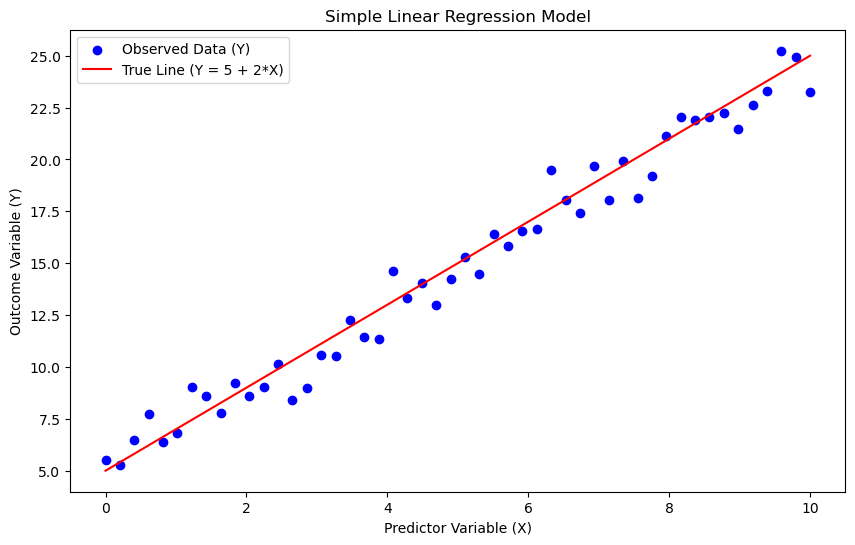

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Step 1: Define Parameters for the Linear Regression Model
np.random.seed(42)  # For reproducibility
B0 = 5              # Intercept (Y when X=0)
B1 = 2              # Slope (change in Y per unit change in X)
sigma = 1           # Standard deviation of the error term (ϵ)

# Step 2: Generate Predictor Variable (X)
X = np.linspace(0, 10, 50)  # 50 points from 0 to 10

# Step 3: Generate Error Term (ϵ) from a Normal Distribution
epsilon = norm.rvs(loc=0, scale=sigma, size=len(X))

# Step 4: Generate Dependent Variable (Y) Using the Regression Equation
Y = B0 + B1 * X + epsilon

# Step 5: Visualize the Data and the True Regression Line
plt.figure(figsize=(10, 6))

# Plot the observed data points
plt.scatter(X, Y, color='blue', label="Observed Data (Y)")

# Plot the true regression line (without error term)
Y_true = B0 + B1 * X
plt.plot(X, Y_true, color='red', label=f"True Line (Y = {B0} + {B1}*X)")

# Plotting details
plt.xlabel("Predictor Variable (X)")
plt.ylabel("Outcome Variable (Y)")
plt.title("Simple Linear Regression Model")
plt.legend()
plt.show()


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     1903.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           2.81e-40
Time:                        04:09:03   Log-Likelihood:                -66.142
No. Observations:                  50   AIC:                             136.3
Df Residuals:                      48   BIC:                             140.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0644      0.258     19.604      0.0

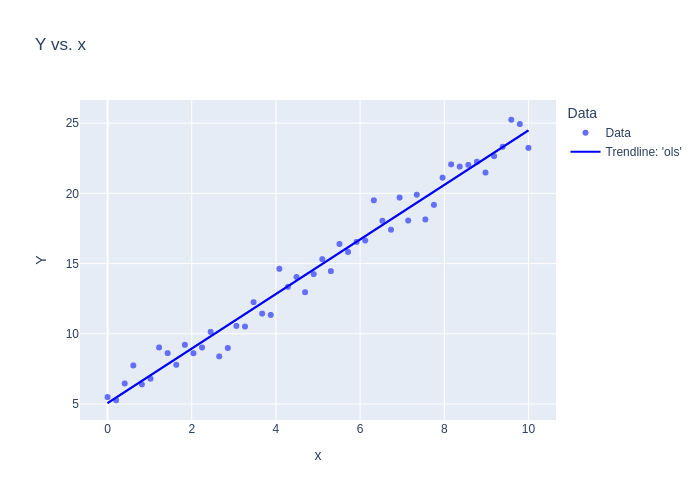

In [2]:
# QUESTION 2) 

# Import necessary libraries
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf  # for statistical modeling
import plotly.express as px  # for plotting

# Set parameters for data simulation
np.random.seed(42)  # For reproducibility
B0 = 5              # Intercept
B1 = 2              # Slope
sigma = 1           # Standard deviation of the error term

# Generate predictor variable (X) and error term (epsilon)
X = np.linspace(0, 10, 50)  # 50 points from 0 to 10
epsilon = np.random.normal(0, sigma, 50)  # Normally distributed errors

# Generate outcome variable (Y) based on linear model Y = B0 + B1 * X + epsilon
Y = B0 + B1 * X + epsilon

# Combine X and Y into a DataFrame
df = pd.DataFrame({'x': X, 'Y': Y})

# Specify and fit the Simple Linear Regression model
# 'Y ~ x' denotes that Y is the dependent variable and x is the predictor
model_data_specification = smf.ols("Y ~ x", data=df)  # model specification
fitted_model = model_data_specification.fit()  # fit the model to data

# Analyze the fitted model's outputs
print(fitted_model.summary())  # Full summary of the regression model
print(fitted_model.summary().tables[1])  # Table of coefficients, SE, t-values, p-values
print(fitted_model.params)  # Coefficients (intercept and slope)
print(fitted_model.params.values)  # Values of the parameters as an array
print(fitted_model.rsquared)  # R-squared value, indicates goodness of fit

# Visualization: Scatter plot with trendline
df['Data'] = 'Data'  # Add a label to distinguish data points in the legend
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')

# Adding the trendline manually to show equivalence with trendline='ols'
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="Trendline: 'ols'")

# Display the plot (use fig.show(renderer="png") for GitHub or MarkUs submissions)
fig.show(renderer="png")


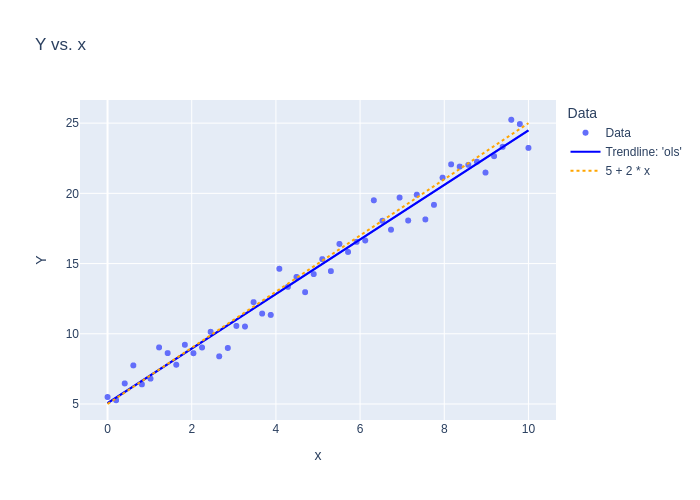

In [3]:
# QUESTION 3)

# Import necessary libraries
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

# Set parameters for data simulation (from Question 1)
np.random.seed(42)
beta0 = 5       # Intercept for theoretical model (B0)
beta1 = 2       # Slope for theoretical model (B1)
sigma = 1       # Standard deviation of the error term

# Generate predictor variable (X) and error term (epsilon)
X = np.linspace(0, 10, 50)
epsilon = np.random.normal(0, sigma, 50)

# Generate outcome variable (Y) based on the theoretical linear model
Y = beta0 + beta1 * X + epsilon
df = pd.DataFrame({'x': X, 'Y': Y})

# Specify and fit the Simple Linear Regression model (from Question 2)
model_data_specification = smf.ols("Y ~ x", data=df)
fitted_model = model_data_specification.fit()

# Visualization: Scatter plot with trendline
df['Data'] = 'Data'
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')

# Adding the trendline manually based on fitted model
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="Trendline: 'ols'")

# Adding the theoretical line (from Question 1)
x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range  # Calculate Y values using the theoretical B0 and B1
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0) + ' + ' + str(beta1) + ' * x', 
                line=dict(dash='dot', color='orange'))

# Display the plot (use fig.show(renderer="png") for GitHub or MarkUs submissions)
fig.show(renderer="png")


QUESTION 3)

The orange dotted line represents the theoretical line of best fit with an assumed normally distributed epsilon. The solid blue line represents the fitted line of best fit, no longer considering epsilon to be noramlly distributed, but instead measuring the residuals in order to plot the line of best fit. 

Its important to note that the difference between the two is caused by sampling variance, as a result of the inherent randomness from each sample, the 

QUESTION 4)

`fitted_model.fittedvalues` are the predicted values calculated from the model's estimated parameters, which are stored in `fitted_model.params`. Each parameter represents the effect of an independent variable on the prediction. To derive these fitted values, we multiply each independent variable by its corresponding coefficient from `fitted_model.params`, sum these products, and add the intercept if included in the model. This calculation is applied to each observation, generating a set of predicted values based on the fitted model.

QUESTION 5)

The ordinary least squares regression chooses the line which minimizes the sum of the squared differences (the residuals) between the observed data point, and the predicted values by the line. OSL works to minimize the residuals of the fitted linear regression model. By squaring all values, we prevent positive and negative residuals from canceling eachother out. Squaring the values results in exclusively positive values. The OSL trendline is produced to represent the smallest possible sum of squared residuals. 

QUESTION 6) 

6.1
The expression first expression compares the residuals squared (Y-fitted_model.fittedValues) to the total variation of Y around its mean. The ratio is basically representing how well that the model can capture the variance seen in Y relative to the baseline of the average Y value. When subtracted from 1, it gives the proportion of total variation in Y. Since R^2 = 1-RSS/TSS, this is actually the definition of R^2.(Residual Sum of Squares, and Total Sum of Squares respectively). 

6.2
fitted_model.rsquared directly gives us the R-squared value, which summarizes how much of the observed variation in Y is explained by the model’s predictions (fitted_model.fittedvalues). A higher R-squared indicates a more accurate model in the sense that it captures more of the variability in Y. Thus, R-squared serves as a measure of the model’s accuracy.

6.3
In the context of Simple Linear Regression, the square of the correlation coefficient, np.corrcoef(Y, fitted_model.fittedvalues)[0,1]**2, also represents R-squared. This is because, in a simple linear regression with one predictor, the square of the correlation between the actual outcomes Y and the fitted (predicted) values is equal to R-squared. This is why squaring the correlation coefficient here captures the proportion of variance in Y explained by the model.

6.4
In the context of Simple Linear Regression, the square of the correlation coefficient between Y and X should capture the R^2 value of the model, this is purely observational since no modeling has actually been done. The squared correlation reflects the degree to which X and Y change together based on the observed datapoints. 

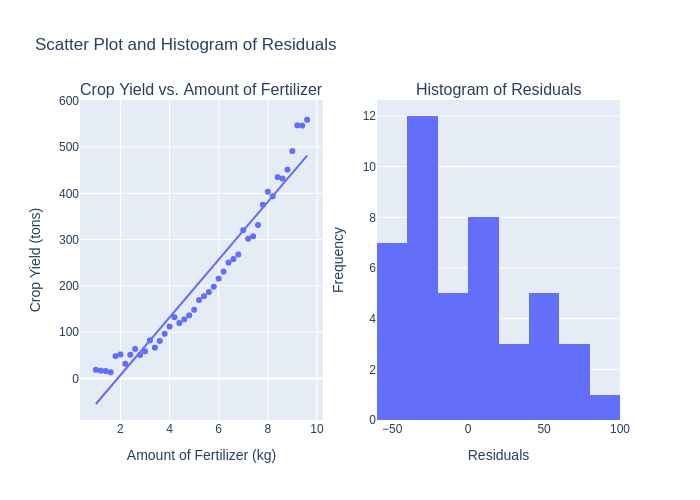

In [4]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png")

QUESTION 7) 

The first issue is that the data correlation does not seem to be linear. The graph of the ammount of fertilizer to the crop yield does not seem to match a linear curve, and instead looks more similar to an exponential or polynomial curve. 

Based on the histogram of residuals and the graph, it appears that the Homoscedasticity (Constant Variance of Errors) is not evenly spread, we also assume that there is normality in residuals, although it appears from the histogram that the residuals have a right skew. 

In [5]:
NEXT PART

import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer="png")

SyntaxError: invalid syntax (3283151998.py, line 1)

In [ ]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

QUESTION 8)

Null Hypothesis (H0): The slope parameter B1 is equal to zero, meaning there is no linear relationship between waiting time and eruption duration.

The R value is 0.811, meaning that approximately 81.1% of the variation in eruption duration is explained by waiting time. This is a high R-squared value, indicating that the model fits the data well.

Our waiting P>|t| value is 0.000. The very low p-value provides very strong evidence against the null hypothesis, meaning we reject the null hypothesis. This suggests a statistically significant positive relationship between waiting time and eruption duration.

In [ ]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

QUESTION 9) 

For short wait times, the data doesn't provide significant evidence of a relationship between waiting time and eruption duration, unlike the findings for the full dataset. The regression output for waiting < 62 shows a slope coefficient of 0.0069, which indicates a slight positive relationship. The p-value for waiting is 0.238, which is too large to be considered significant. This high p-value suggests that we cannot reject the null hypothesis that the slope (B1) is zero, meaning there is no statistically significant linear association between waiting time and duration within this subset. This lack of significance and the near-flat slope in the trendline implies that short wait times exhibit minimal change in eruption duration, and the observed relationship in the full dataset might have been primarily caused by longer waits, where eruption duration increases more.

In [ ]:
# QUESTION 10

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

# Assume old_faithful DataFrame is already loaded
# long_wait_limit = 71
# long_wait = old_faithful['waiting'] > long_wait_limit
# filtered_data = old_faithful[long_wait]
x_values = old_faithful['waiting']
n_simulations = 1000
sample_size = 160
b0 = 1.65
b1 = 0
sigma = 0.37

# Collect slope coefficients from bootstrapping under the null hypothesis
slope_coefficients = []

for _ in range(n_simulations):
    y_simulated = b0 + b1 * x_values + np.random.normal(0, sigma, len(x_values))
    simulated_data = pd.DataFrame({'waiting': x_values, 'duration': y_simulated}).sample(n=sample_size, replace=True)
    model = smf.ols('duration ~ waiting', data=simulated_data).fit()
    slope_coefficients.append(model.params['waiting'])

# Convert to DataFrame
slope_df = pd.DataFrame(slope_coefficients, columns=['slope'])

# Calculate 95% bootstrapped confidence interval for slope
lower_bound = np.percentile(slope_coefficients, 2.5)
upper_bound = np.percentile(slope_coefficients, 97.5)
contains_zero = lower_bound <= 0 <= upper_bound

# Print results for bootstrapped confidence interval
print(f"95% Bootstrapped Confidence Interval for slope: ({lower_bound:.4f}, {upper_bound:.4f})")
print(f"Does the 95% CI contain 0? {'Yes' if contains_zero else 'No'}")

# Calculate bootstrapped p-value
# Bootstrapped p-value is the proportion of bootstrapped slopes that are as extreme or more extreme than the observed slope
observed_model = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit()
observed_slope = observed_model.params['waiting']
bootstrapped_p_value = np.mean(np.abs(slope_coefficients) >= np.abs(observed_slope))

print(f"Bootstrapped p-value: {bootstrapped_p_value:.4f}")

# Compare with observed OLS p-value from summary
observed_p_value = observed_model.pvalues['waiting']
print(f"Observed p-value from OLS model: {observed_p_value:.4f}")


QUESTION 11) 

For this analysis, I redefined "short" and "long" waits as under 68 minutes and 68 minutes or more, and used an indicator variable model, duration ~ C(kind, Treatment(reference="short")), to compare average eruption durations between these two groups. Unlike the previous models that assumed a continuous linear relationship across all wait times or within specific ranges, this model treats wait time as a categorical variable, so I can directly test if there’s a significant difference in eruption duration between “short” and “long” waits. This approach makes it easy to interpret the average effect of being in the "long" category without assuming any trend across all data, which is especially helpful if there’s a non-linear relationship.

After running the indicator variable model duration ~ C(kind, Treatment(reference="short")), I obtained the regression output and boxplot. In this model, I treated wait times as either “short” (under 68 minutes) or “long” (68 minutes or more), with “short” as the reference category. The coefficient for C(kind, Treatment(reference="short"))[T.long] is 2.2036, meaning that on average, “long” wait times are associated with eruptions that are about 2.2 minutes longer than those following “short” wait times. The p-value for this coefficient is 0.000, which is highly significant. This provides strong evidence against the null hypothesis of "no difference in eruption duration between short and long wait times," indicating a statistically significant difference in average duration between the two categories.

QUESTION 12) 

The histogram for Model 1 best supports the assumption that the distribution of error terms is normal. This model’s residuals are symmetrically distributed around zero, closely following the bell-shaped curve of a normal distribution, with minimal skew or irregularity.

The other histograms do not align as well with the normality assumption. Model 3, while somewhat symmetric, shows a slight deviation from perfect normality. Model 2 is skewed and concentrated on one side, deviating significantly from the normal curve. Model 4 also shows slight skew and irregularity.

In [ ]:
# QUESTION 13)

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

# Assume old_faithful DataFrame is already loaded with columns 'waiting' and 'duration'
# Separate "short" and "long" wait groups based on waiting time threshold
long_wait_limit = 71
short_wait = old_faithful[old_faithful['waiting'] <= long_wait_limit]['duration']
long_wait = old_faithful[old_faithful['waiting'] > long_wait_limit]['duration']

# Observed difference in means
observed_difference = long_wait.mean() - short_wait.mean()

# (A) Permutation Test by Shuffling Labels
n_permutations = 1000
permuted_differences = []

for _ in range(n_permutations):
    # Combine the two groups and shuffle labels
    combined = pd.concat([short_wait, long_wait])
    shuffled = combined.sample(frac=1, replace=False).reset_index(drop=True)
    
    # Split the shuffled data back into two groups of the same size as the original groups
    perm_short_wait = shuffled[:len(short_wait)]
    perm_long_wait = shuffled[len(short_wait):]
    
    # Calculate the difference in means for the permuted groups
    permuted_differences.append(perm_long_wait.mean() - perm_short_wait.mean())

# Calculate p-value as the proportion of permuted differences as extreme or more extreme than the observed difference
p_value = np.mean(np.abs(permuted_differences) >= np.abs(observed_difference))

print(f"Observed difference in means: {observed_difference:.4f}")
print(f"Permutation test p-value: {p_value:.4f}")

# (B) Bootstrapped 95% Confidence Interval for the Difference in Means
n_bootstrap_samples = 1000
bootstrapped_mean_differences = []

for _ in range(n_bootstrap_samples):
    # Resample each group with replacement
    boot_short_wait = short_wait.sample(len(short_wait), replace=True)
    boot_long_wait = long_wait.sample(len(long_wait), replace=True)
    
    # Calculate the difference in means for the bootstrap samples
    bootstrapped_mean_differences.append(boot_long_wait.mean() - boot_short_wait.mean())

# Calculate the 95% confidence interval from the bootstrapped mean differences
ci_lower, ci_upper = np.quantile(bootstrapped_mean_differences, [0.025, 0.975])

print(f"95% Bootstrap Confidence Interval for difference in means: ({ci_lower:.4f}, {ci_upper:.4f})")

# Summary comparison to indicator variable model (in case you want to use it for verification)
# This step is optional: includes an indicator variable model for comparison purposes
indicator_model = smf.ols('duration ~ C(waiting > @long_wait_limit)', data=old_faithful).fit()
indicator_difference = indicator_model.params[1]  # Coefficient for indicator variable
indicator_p_value = indicator_model.pvalues[1]    # P-value for indicator variable

print(f"Indicator variable model estimate for difference: {indicator_difference:.4f}")
print(f"Indicator variable model p-value: {indicator_p_value:.4f}")


QUESTION 13) 

a) In the permutation test, I check if the observed difference in means between "short" and "long" wait groups could happen by chance. I do this by shuffling the group labels many times, recalculating the mean difference each time to build a null distribution. The p-value is the proportion of shuffled differences as extreme as the observed one. In the bootstrap approach, I resample each group with replacement and calculate the mean difference repeatedly, creating a distribution of bootstrapped differences. The 95% confidence interval, from the 2.5th and 97.5th percentiles, shows the likely range for the true difference in means.

b) The indicator variable model uses a regression with a binary indicator for "short" and "long" waits to estimate the mean difference. This approach assumes normality and equal variance, which can limit reliability if these assumptions are violated. The permutation and bootstrap methods are non-parametric, so they don’t rely on these assumptions. The permutation test gives a p-value by comparing the observed difference to a null distribution of shuffled labels, while the bootstrap method provides a confidence interval by resampling within each group. Both are more flexible than the indicator model, making them ideal when the data might not meet normality or equal variance assumptions.

QUESTION 14)

yes

LINK TO CHAT: https://chatgpt.com/share/672d8dc1-78f0-8004-a80b-f2a8db611fe6

SUMMARY OF CHAT: 

Here’s a summary of our interactions:

1. **Simple Linear Regression Explanation**: We discussed the components of a Simple Linear Regression model, including predictor and outcome variables, slope and intercept, and the error term. We also examined the assumptions of linear regression (e.g., linearity, independence of errors, homoscedasticity, normality of residuals, and exogeneity).

2. **Code Implementation and Modifications**: You requested Python code for simulating data, bootstrapping, and visualizing sampling distributions. I provided code for:
   - Creating a simple regression model using bootstrap samples to generate a distribution of slope coefficients.
   - Simulating samples from a null hypothesis where no association exists, and visualizing the distribution of slope coefficients under these conditions.
   - Performing a permutation test and calculating a bootstrap confidence interval for the difference in means between groups.

3. **Interpretation of Statistical Methods**: We explored the theoretical foundation of these statistical methods:
   - How permutation tests work by shuffling labels to generate a null distribution.
   - The purpose and process of bootstrapping for confidence intervals by resampling.
   - The differences between these non-parametric methods and a parametric approach using an indicator variable model.

4. **Comparison of Methods**: We contrasted the permutation test, bootstrap, and indicator variable model, noting similarities in how they assess differences in group means and highlighting their differences in terms of assumptions, robustness, and interpretation.

Throughout our discussions, we emphasized the practical applications of these statistical approaches, particularly when assumptions of normality or homoscedasticity may not hold. Each approach has its advantages based on data structure and analysis goals, providing complementary insights into the data’s underlying patterns and group comparisons.